# Image Classification with SciKit-Learn (Decision Tree)



In [36]:
from scipy import ndimage, misc
def prep_data (folder):
    # iterate through folders, assembling feature, label, and classname data objects
    import os
    import numpy as np
    import matplotlib.pyplot as plt

    class_id = 0
    features = []
    labels = np.array([])
    classnames = []
    for root, dirs, filenames in os.walk(folder):
        for d in sorted(dirs):

            classnames.append(d)
            files = os.listdir(os.path.join(root,d))
            for f in files:
                # Load the image file
                imgFile = os.path.join(root,d, f)
                img = plt.imread(imgFile)
                img = misc.imresize(img, (128, 128))

                features.append(img.ravel())
                

                labels = np.append(labels, class_id )
            class_id  += 1
            

    features = np.array(features)
    
    return features, labels, classnames



training_folder_name = '../data/faces/training'


features, labels, classnames = prep_data(training_folder_name)
print(len(features), 'features')
print(len(labels), 'labels')
print(len(classnames), 'classes:', classnames)

Reading data from 1


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:22: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Reading data from 10
Reading data from 11
Reading data from 12
Reading data from 13
Reading data from 14
Reading data from 15
Reading data from 16
Reading data from 17
Reading data from 18
Reading data from 19
Reading data from 2
Reading data from 20
Reading data from 3
Reading data from 4
Reading data from 5
Reading data from 6
Reading data from 7
Reading data from 8
Reading data from 9
280 features
280 labels
20 classes: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '3', '4', '5', '6', '7', '8', '9']


In [37]:
print('Feature Shape:',features.shape)
print('Labels Shape:',labels.shape)

Feature Shape: (280, 49152)
Labels Shape: (280,)


In [38]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.30)

print('Training records:',Y_train.size)
print('Test records:',Y_test.size)

Training records: 196
Test records: 84


In [39]:
# Train the model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

X_train_float = X_train.astype('float64')

img_pipeline = Pipeline([('norm', MinMaxScaler()),
                         ('classify', DecisionTreeClassifier()),
                        ])

clf = img_pipeline.fit(X_train_float, Y_train)



Training model...
classifier trained!


Classifier Metrics:
              precision    recall  f1-score   support

           1       0.86      0.86      0.86         7
          10       1.00      1.00      1.00         5
          11       1.00      0.83      0.91         6
          12       1.00      1.00      1.00         3
          13       0.20      1.00      0.33         1
          14       1.00      0.50      0.67         2
          15       1.00      0.50      0.67         2
          16       1.00      0.75      0.86         4
          17       0.60      0.75      0.67         4
          18       1.00      0.67      0.80         3
          19       1.00      0.67      0.80         6
           2       0.50      0.75      0.60         4
          20       1.00      0.50      0.67         8
           3       0.43      0.50      0.46         6
           4       0.75      0.75      0.75         4
           5       1.00      0.33      0.50         6
           6       0.83      0.83      0.83         6
       

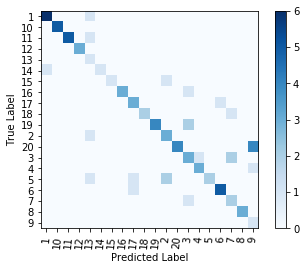

In [40]:
# Evaluate classifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X_test_float = X_test.astype('float64')

predictions = clf.predict(X_test)


cm = confusion_matrix(Y_test, np.round(predictions, 0))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()